In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
# create data and initialize weight
X = torch.tensor([t for t in range(20)], dtype=torch.float32)
y = torch.tensor([3*t + torch.rand(1, dtype=torch.float32) for t in range(20)]
                 , dtype=torch.float32)
w = torch.randn(1, dtype=torch.float32, requires_grad=True)

# User defined forward pass and loss

In [ ]:
# model prediction
def forward(x):
  return w * x

In [ ]:
# loss - MSE
def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

In [ ]:
# parameters
n_epochs = 50
learning_rate = 0.0005

# history
hist = {'epoch':[], 'loss':[], 'weight':[]}

# test case
X_test = torch.tensor(5, dtype=torch.float32)
print(f"Prediction before training f(X_test): {forward(X_test).item():.3f}")

# train model
for epoch in range(n_epochs):
  # prediction - forward pass
  y_pred = forward(X)

  # loss
  l = loss(y, y_pred)

  # gradients - backward pass
  l.backward()

  # update weights
  dw = w.grad
  with torch.no_grad():
    w -= learning_rate * dw

  # update history
  hist['epoch'].append(epoch)
  hist['loss'].append(l.item())
  hist['weight'].append(w.item())

  # reset weight gradients to zero
  w.grad.zero_()

  # print weight and loss
  if (epoch+1)%10 == 0:
    print(f"Epoch {epoch+1}: Loss - {l.item():.5f}, Weight - {w.item():.3f}")

print(f"Prediction after training f(X_test): {forward(X_test).item():.3f}")

Prediction before training f(X_test): -4.390
Epoch 10: Loss - 177.32751, Weight - 1.995
Epoch 20: Loss - 12.83446, Weight - 2.764
Epoch 30: Loss - 1.05337, Weight - 2.970
Epoch 40: Loss - 0.20960, Weight - 3.025
Epoch 50: Loss - 0.14917, Weight - 3.040
Prediction after training f(X_test): 15.198


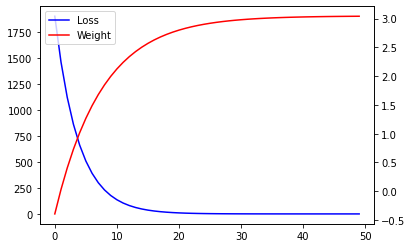

In [ ]:
ax1 = plt.subplot()
l1, = ax1.plot(hist['epoch'], hist['loss'], 'b-')
ax2 = ax1.twinx()
l2, = ax2.plot(hist['epoch'], hist['weight'], 'r')
plt.legend([l1, l2], ["Loss", "Weight"])
plt.xlabel('Epochs')
plt.show()

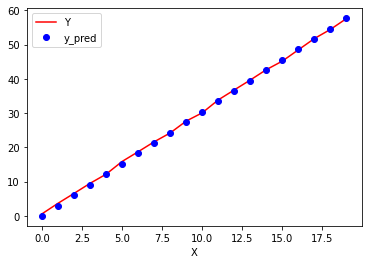

In [ ]:
with torch.no_grad():
  l1, = plt.plot(X, y, 'r-')
  l2, = plt.plot(X, y_pred, 'bo')
  plt.xlabel('X')
  plt.legend([l1, l2], ["Y", "y_pred"])
  plt.show()